In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math

## Task 3a

In [2]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0 
    rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0 
    rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    
    rate_p_tetR_prod = kp*m_tetR
    rate_p_lacI_prod = kp*m_lacI
    rate_p_cI_prod   = kp*m_cI
    
    rate_m_tetR_loss = kdm*m_tetR
    rate_m_lacI_loss = kdm*m_lacI
    rate_m_cI_loss   = kdm*m_cI
    
    rate_p_tetR_loss = kdp*p_tetR
    rate_p_lacI_loss = kdp*p_lacI
    rate_p_cI_loss   = kdp*p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [3]:
# modified parameter values (n)
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 1.3

params = [km, km0, kdm, kp, kdp, K, n]


#intitial condtions
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


# set time observations
t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1)

# run simulation
s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs1 = s_obs1[:,0]
m_lacI_obs1 = s_obs1[:,1]
m_cI_obs1 =   s_obs1[:,2]

p_tetR_obs1 = s_obs1[:,3]
p_lacI_obs1 = s_obs1[:,4]
p_cI_obs1 =   s_obs1[:,5]

### Repressilator ODE simulation with changed n value.

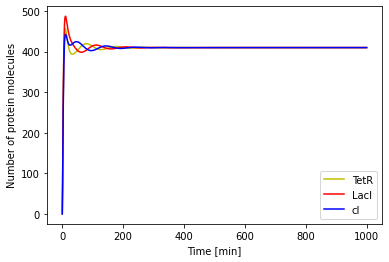

In [4]:
%matplotlib inline
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs1, "y-", label="TetR")
ax.plot(t_obs, p_lacI_obs1, "r-", label="LacI")
ax.plot(t_obs, p_cI_obs1, "b-", label="cI")
ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Number of protein molecules")

# plt.savefig("Task3_figure1.png")

In [5]:
# modified parameter values (n)
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40


#intitial condtions
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0
  
    
p_tetR = []
n_vals = [1, 1.3, 1.5, 1.6, 1.7, 2, 4]

for n in n_vals:
    params = [km, km0, kdm, kp, kdp, K, n]

    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 1000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  
    p_tetR += [s_obs1[:,3]]


### Repressilator ODE simulation with multiple n values.

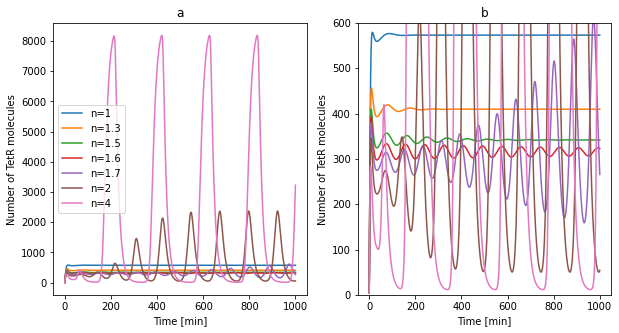

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax1, ax2 = ax

for i in range(len(n_vals)):
    ax1.plot(t_obs, p_tetR[i], label=f"n={n_vals[i]}")
    ax2.plot(t_obs, p_tetR[i], label=f"n={n_vals[i]}")

ax1.legend()
ax1.set_title("a")
ax1.set_xlabel("Time [min]")
ax1.set_ylabel("Number of TetR molecules")

ax2.set_title("b")
ax2.set_ylim(0,600)
ax2.set_xlabel("Time [min]")
ax2.set_ylabel("Number of TetR molecules")

# plt.savefig("Task3_figure2.png")

## Task 3b

In [7]:
n_vals = np.linspace(1,4,100)
p_tetR_max_vals = []
p_tetR_min_vals = []

#intitial condtions
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0
    
for n in n_vals:
    params = [km, km0, kdm, kp, kdp, K, n]

    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 10000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  
    p_tetR_max_vals += [np.max(s_obs1[:,3][-500:])]
    p_tetR_min_vals += [np.min(s_obs1[:,3][-500:])]

### Repressilator behaviour as n changes

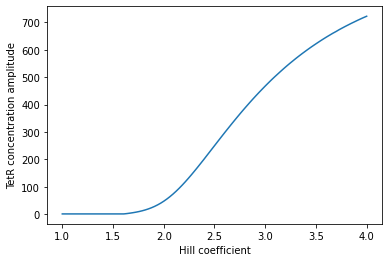

In [8]:
fig, ax = plt.subplots(1,1)

ax.plot(n_vals, np.array(p_tetR_max_vals)/np.array(p_tetR_min_vals))
ax.set_xlabel("Hill coefficient")
ax.set_ylabel("TetR concentration amplitude")

# plt.savefig("Task3_figure3.png")

## Task 3c

In [9]:
kp_vals = np.linspace(0.1,100,100)
p_tetR_max_vals = []
p_tetR_min_vals = []

#intitial condtions
km = 30
km0 = 0.03
kdm = 0.3466
kdp = 0.06931
K = 40
n = 2

m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0
    
for kp in kp_vals:
    params = [km, km0, kdm, kp, kdp, K, n]

    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 10000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  
    p_tetR_max_vals += [np.max(s_obs1[:,3][-500:])]
    p_tetR_min_vals += [np.min(s_obs1[:,3][-500:])]

### Repressilator behaviour as kp changes

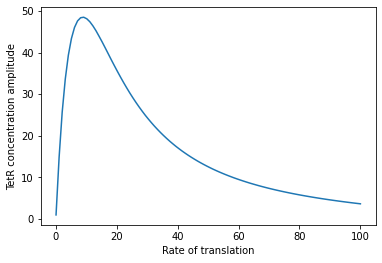

In [10]:
fig, ax = plt.subplots(1,1)

ax.plot(kp_vals, np.array(p_tetR_max_vals)/np.array(p_tetR_min_vals))
ax.set_xlabel("Rate of translation")
ax.set_ylabel("TetR concentration amplitude")

# plt.savefig("Task3_figure4.png")

In [13]:
km0_vals = np.linspace(0,3,100)
p_tetR_max_vals = []
p_tetR_min_vals = []

#intitial condtions
km = 30
kp = 6.931
kdm = 0.3466
kdp = 0.06931
K = 40
n = 2

m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0
    
for km0 in km0_vals:
    params = [km, km0, kdm, kp, kdp, K, n]

    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 10000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  
    p_tetR_max_vals += [np.max(s_obs1[:,3][-500:])]
    p_tetR_min_vals += [np.min(s_obs1[:,3][-500:])]

### Repressilator behaviour as km0 changes

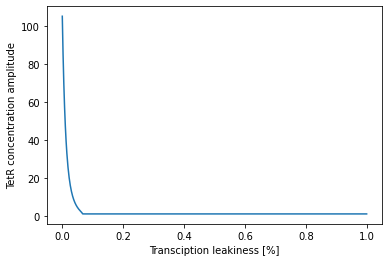

In [12]:
fig, ax = plt.subplots(1,1)

ax.plot(km0_vals/30*10, np.array(p_tetR_max_vals)/np.array(p_tetR_min_vals))
ax.set_xlabel("Transciption leakiness [%]")
ax.set_ylabel("TetR concentration amplitude")

# plt.savefig("Task3_figure5.png")